## Geometric Brownian Motion (GBM)

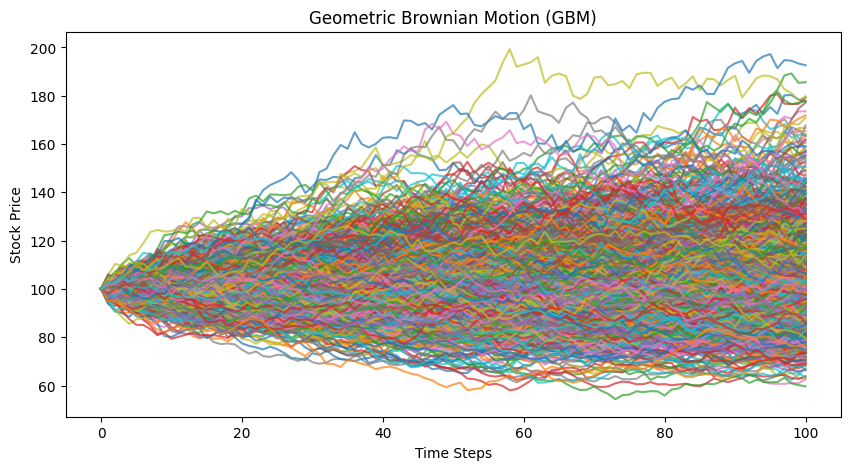

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class GeometricBrownianMotion:
    def __init__(self, S0, mu, sigma, T, dt, n_paths):
        self.S0 = S0
        self.mu = mu
        self.sigma = sigma
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_steps = int(T / dt)
    
    def simulate(self):
        S = np.zeros((self.n_steps + 1, self.n_paths))
        S[0] = self.S0
        for t in range(1, self.n_steps + 1):
            Z = np.random.standard_normal(self.n_paths)
            S[t] = S[t-1] * np.exp((self.mu - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z)
        return S
    
    def plot(self):
        S = self.simulate()
        plt.figure(figsize=(10, 5))
        plt.plot(S, alpha=0.7)
        plt.title("Geometric Brownian Motion (GBM)")
        plt.xlabel("Time Steps")
        plt.ylabel("Stock Price")
        plt.show()

# Example usage:
gbm = GeometricBrownianMotion(S0=100, mu=0.05, sigma=0.2, T=1, dt=0.01, n_paths=1000)
gbm.plot()


## Ornstein-Uhlenbeck Process (Mean-Reverting)

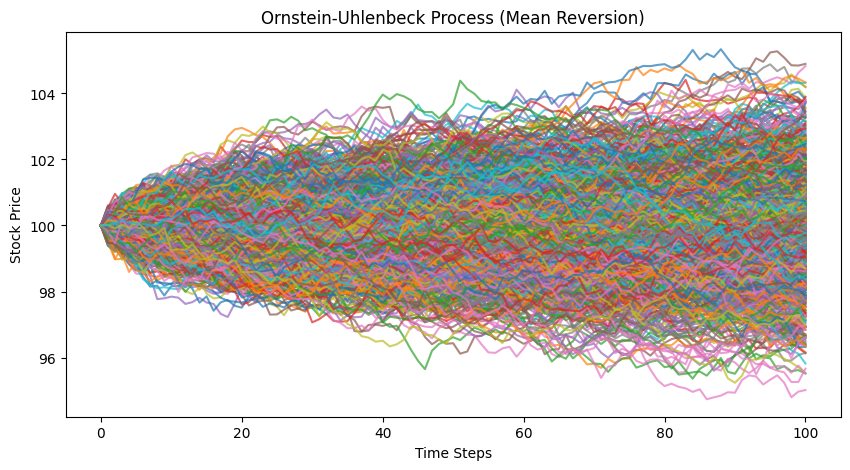

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class OrnsteinUhlenbeck:
    def __init__(self, S0, theta, mu, sigma, T, dt, n_paths):
        self.S0 = S0
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_steps = int(T / dt)
    
    def simulate(self):
        S = np.zeros((self.n_steps + 1, self.n_paths))
        S[0] = self.S0
        for t in range(1, self.n_steps + 1):
            Z = np.random.standard_normal(self.n_paths)
            S[t] = S[t-1] + self.theta * (self.mu - S[t-1]) * self.dt + self.sigma * np.sqrt(self.dt) * Z
        return S
    
    def plot(self):
        S = self.simulate()
        plt.figure(figsize=(10, 5))
        plt.plot(S, alpha=0.7)
        plt.title("Ornstein-Uhlenbeck Process (Mean Reversion)")
        plt.xlabel("Time Steps")
        plt.ylabel("Stock Price")
        plt.show()

# Example usage:
ou = OrnsteinUhlenbeck(S0=100, theta=0.5, mu=100, sigma=2, T=1, dt=0.01, n_paths=1000)
ou.plot()


## Heston Model (Stochastic Volatility)

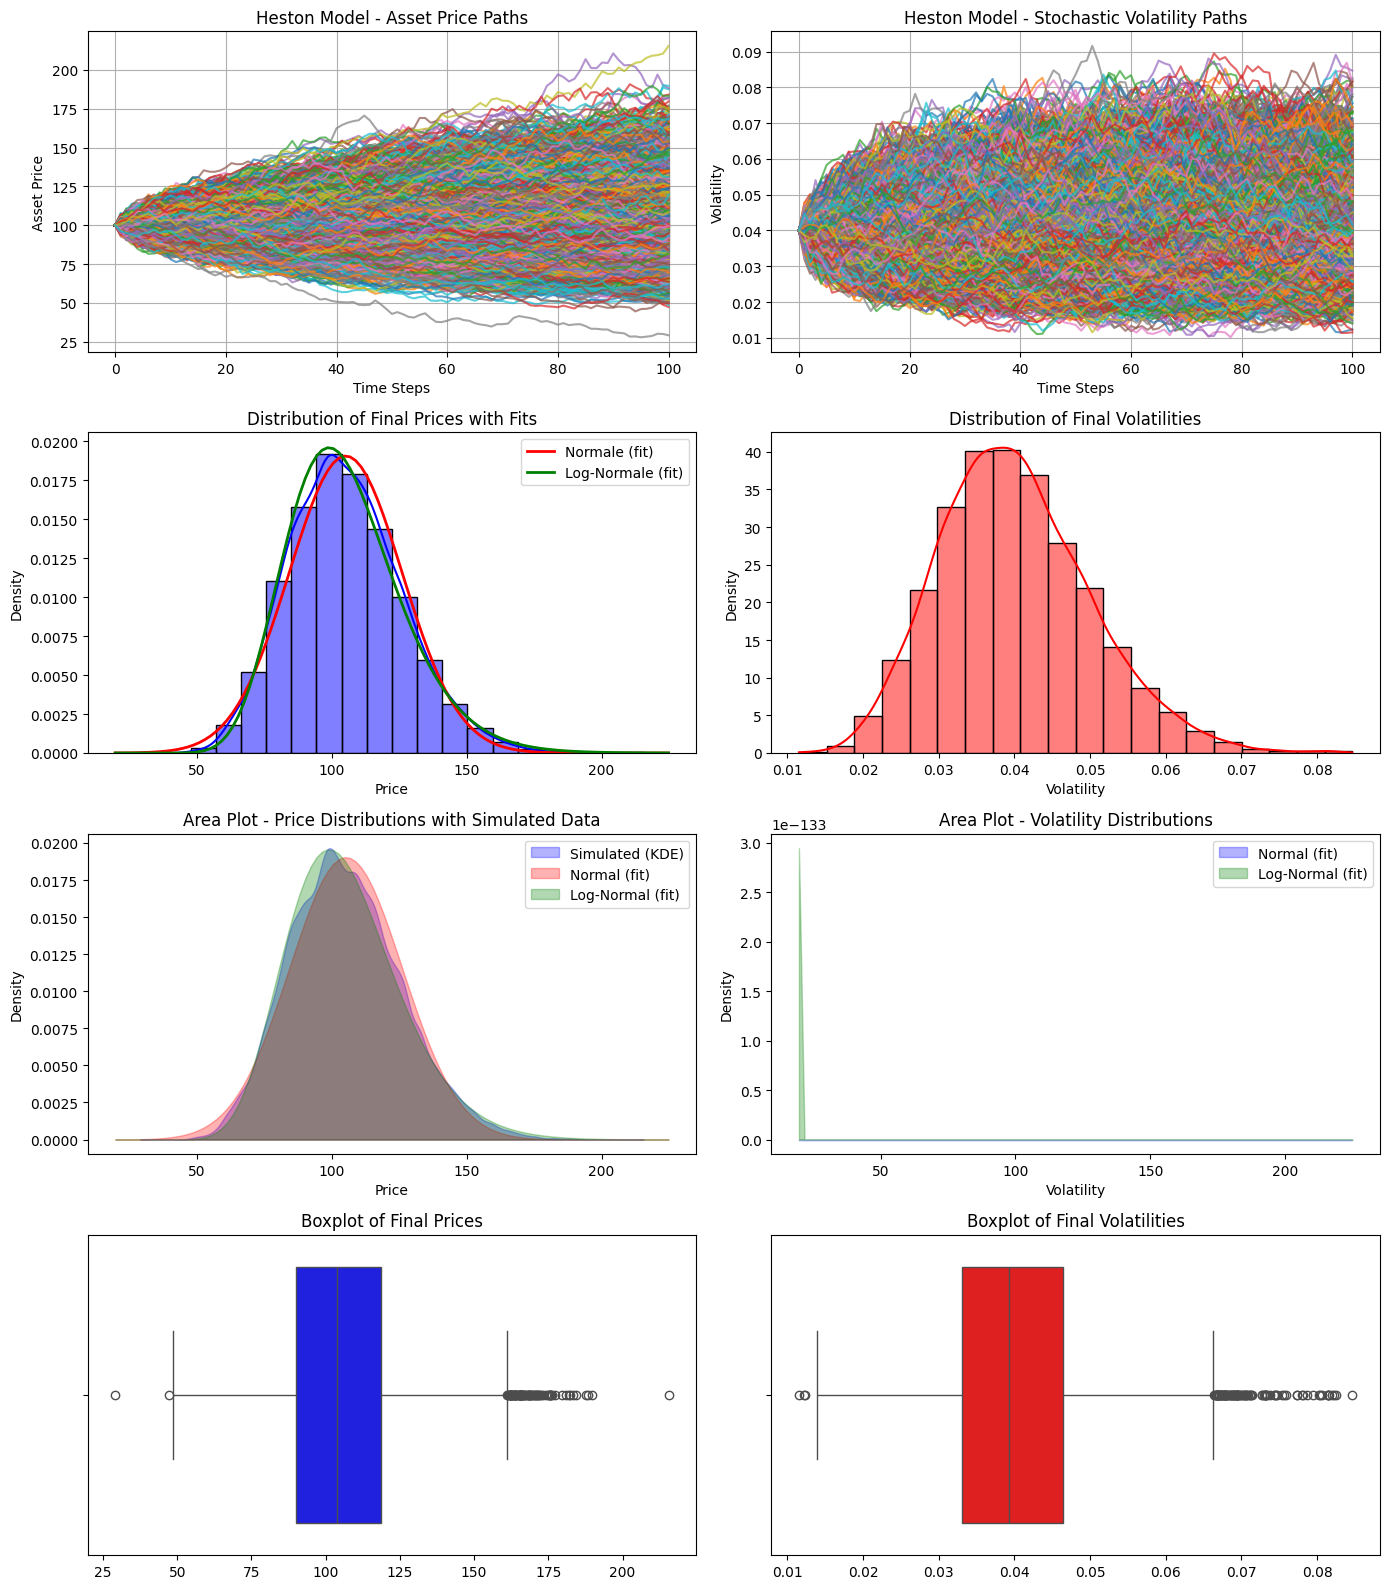

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm
from scipy.stats import gaussian_kde

class HestonModel:
    def __init__(self, S0, v0, mu, kappa, theta, sigma_v, rho, T, dt, n_paths):
        self.S0 = S0
        self.v0 = v0
        self.mu = mu
        self.kappa = kappa
        self.theta = theta
        self.sigma_v = sigma_v
        self.rho = rho
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_steps = int(T / dt)
    
    def simulate(self):
        S = np.zeros((self.n_steps + 1, self.n_paths))
        v = np.zeros((self.n_steps + 1, self.n_paths))
        S[0] = self.S0
        v[0] = self.v0
        
        for t in range(1, self.n_steps + 1):
            Z1 = np.random.standard_normal(self.n_paths)
            Z2 = np.random.standard_normal(self.n_paths)
            Z2 = self.rho * Z1 + np.sqrt(1 - self.rho**2) * Z2  # Correlation between shocks

            v[t] = np.abs(v[t-1] + self.kappa * (self.theta - v[t-1]) * self.dt + 
                          self.sigma_v * np.sqrt(v[t-1] * self.dt) * Z2)
            
            S[t] = S[t-1] * np.exp((self.mu - 0.5 * v[t-1]) * self.dt + 
                                   np.sqrt(v[t-1] * self.dt) * Z1)
        return S, v
    
    def plot(self):
        S, v = self.simulate()
        final_prices = S[-1]  # Final asset prices
        final_vols = v[-1]  # Final volatilities

        # Parameters for normal and log-normal distributions
        mu_final = np.mean(final_prices)
        sigma_final = np.std(final_prices)
        
        shape, loc, scale = lognorm.fit(final_prices, floc=0)  # Fit log-normal distribution

        # Create subplots for price and volatility distribution analysis
        fig, ax = plt.subplots(4, 2, figsize=(14, 16))

        # Plot Asset Price Paths
        ax[0, 0].plot(S, alpha=0.7)
        ax[0, 0].set_title("Heston Model - Asset Price Paths")
        ax[0, 0].set_xlabel("Time Steps")
        ax[0, 0].set_ylabel("Asset Price")
        ax[0, 0].grid(True)

        # Plot Volatility Paths
        ax[0, 1].plot(v, alpha=0.7)
        ax[0, 1].set_title("Heston Model - Stochastic Volatility Paths")
        ax[0, 1].set_xlabel("Time Steps")
        ax[0, 1].set_ylabel("Volatility")
        ax[0, 1].grid(True)

        # Histogram of final prices with Normal and Log-Normal fitted distributions
        sns.histplot(final_prices, bins=20, kde=True, ax=ax[1, 0], color="blue", stat="density")
        
        # Distribution normale
        xmin, xmax = ax[1, 0].get_xlim()
        x_normal = np.linspace(xmin, xmax, 100)
        p_normal = norm.pdf(x_normal, mu_final, sigma_final)
        ax[1, 0].plot(x_normal, p_normal, 'r-', label='Normale (fit)', lw=2)

        # Distribution log-normale
        x_lognormal = np.linspace(xmin, xmax, 100)
        p_lognormal = lognorm.pdf(x_lognormal, shape, loc, scale)
        ax[1, 0].plot(x_lognormal, p_lognormal, 'g-', label='Log-Normale (fit)', lw=2)

        ax[1, 0].set_title("Distribution of Final Prices with Fits")
        ax[1, 0].set_xlabel("Price")
        ax[1, 0].set_ylabel("Density")
        ax[1, 0].legend()


        # Area plot for price distributions (below histogram) using the simulated distribution
        # KDE plot of final prices with Normal and Log-Normal distributions as areas
        kde_prices = gaussian_kde(final_prices, bw_method=0.1)
        x_prices = np.linspace(np.min(final_prices), np.max(final_prices), 1000)
        kde_values = kde_prices(x_prices)
        ax[2, 0].fill_between(x_prices, kde_values, alpha=0.3, color="blue", label="Simulated (KDE)")
        ax[2, 0].fill_between(x_normal, 0, p_normal, alpha=0.3, color="red", label="Normal (fit)")
        ax[2, 0].fill_between(x_lognormal, 0, p_lognormal, alpha=0.3, color="green", label="Log-Normal (fit)")
        ax[2, 0].set_title("Area Plot - Price Distributions with Simulated Data")
        ax[2, 0].set_xlabel("Price")
        ax[2, 0].set_ylabel("Density")
        ax[2, 0].legend()

        # Histogram of final volatilities
        sns.histplot(final_vols, bins=20, kde=True, ax=ax[1, 1], color="red", stat="density")
        ax[1, 1].set_title("Distribution of Final Volatilities")
        ax[1, 1].set_xlabel("Volatility")
        ax[1, 1].set_ylabel("Density")

        # Area plot for volatility distributions (below histogram)
        mu_vol = np.mean(final_vols)
        sigma_vol = np.std(final_vols)
        p_vol_normal = norm.pdf(x_normal, mu_vol, sigma_vol)
        ax[2, 1].fill_between(x_normal, 0, p_vol_normal, alpha=0.3, color="blue", label="Normal (fit)")

        # Log-normal distribution fit for volatility
        shape_vol, loc_vol, scale_vol = lognorm.fit(final_vols, floc=0)
        p_vol_lognormal = lognorm.pdf(x_normal, shape_vol, loc_vol, scale_vol)
        ax[2, 1].fill_between(x_normal, 0, p_vol_lognormal, alpha=0.3, color="green", label="Log-Normal (fit)")

        
        ax[2, 1].set_title("Area Plot - Volatility Distributions")
        ax[2, 1].set_xlabel("Volatility")
        ax[2, 1].set_ylabel("Density")
        ax[2, 1].legend()

        # Boxplot of final prices
        sns.boxplot(x=final_prices, ax=ax[3, 0], color="blue")
        ax[3, 0].set_title("Boxplot of Final Prices")

        # Boxplot of final volatilities
        sns.boxplot(x=final_vols, ax=ax[3, 1], color="red")
        ax[3, 1].set_title("Boxplot of Final Volatilities")

        plt.tight_layout()
        plt.show()

# Example usage
heston = HestonModel(S0=100, v0=0.04, mu=0.05, kappa=2, theta=0.04, sigma_v=0.1, rho=-0.5, T=1, dt=0.01, n_paths=10000)
heston.plot()


## Merton Jump Diffusion Model

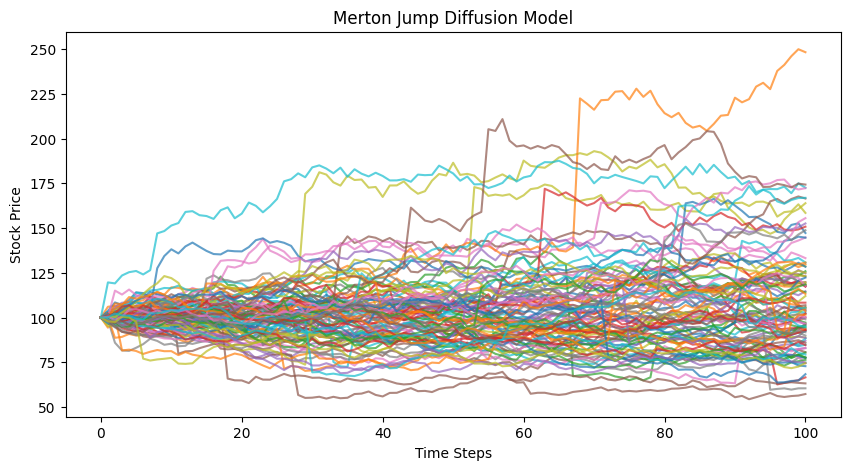

In [6]:
class MertonJumpDiffusion:
    def __init__(self, S0, mu, sigma, lambda_, jump_mean, jump_std, T, dt, n_paths):
        self.S0 = S0
        self.mu = mu
        self.sigma = sigma
        self.lambda_ = lambda_
        self.jump_mean = jump_mean
        self.jump_std = jump_std
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_steps = int(T / dt)
    
    def simulate(self):
        S = np.zeros((self.n_steps + 1, self.n_paths))
        S[0] = self.S0
        for t in range(1, self.n_steps + 1):
            Z = np.random.standard_normal(self.n_paths)
            jumps = np.random.poisson(self.lambda_ * self.dt, self.n_paths)
            jump_size = np.random.normal(self.jump_mean, self.jump_std, self.n_paths) * jumps
            S[t] = S[t-1] * np.exp((self.mu - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * Z + jump_size)
        return S
    
    def plot(self):
        S = self.simulate()
        plt.figure(figsize=(10, 5))
        plt.plot(S, alpha=0.7)
        plt.title("Merton Jump Diffusion Model")
        plt.xlabel("Time Steps")
        plt.ylabel("Stock Price")
        plt.show()

# Example usage:
merton = MertonJumpDiffusion(S0=100, mu=0.05, sigma=0.2, lambda_=1, jump_mean=0, jump_std=0.2, T=1, dt=0.01, n_paths=100)
merton.plot()


## Multivariate Geometric Brownian Motion

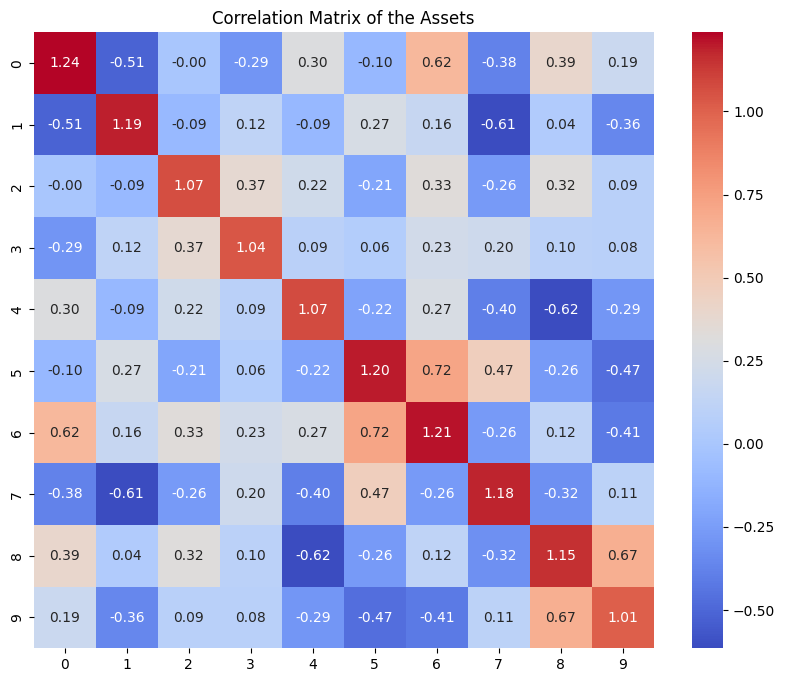

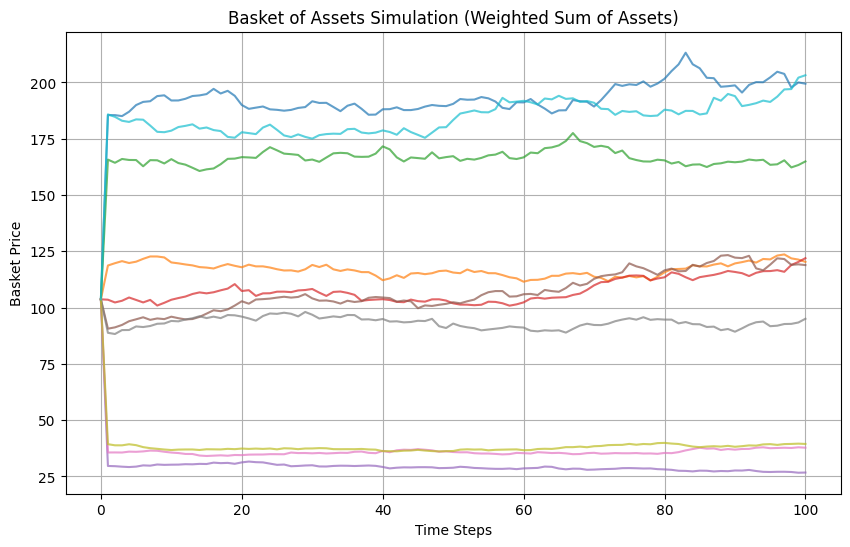

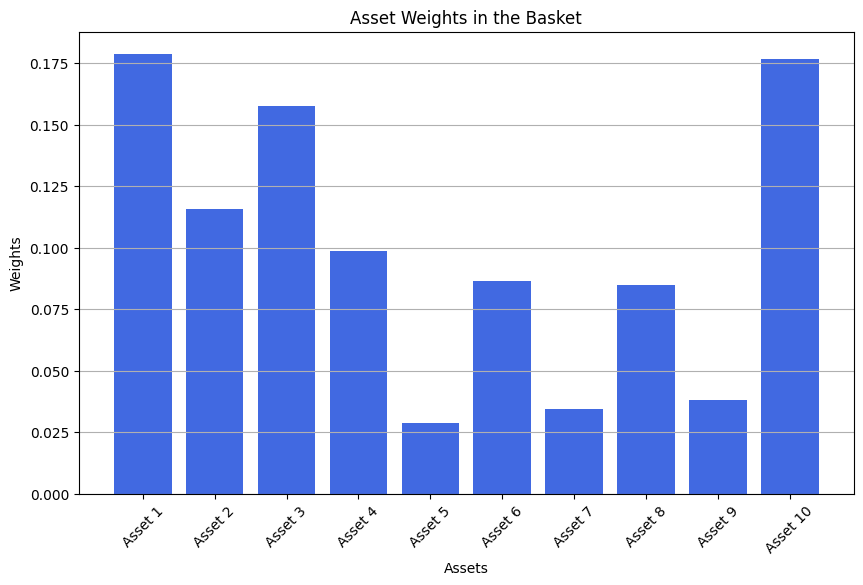

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class BasketSimulation:
    def __init__(self, S0, mu, sigma, correlation_matrix, T, dt, n_paths, weights):
        """
        S0: Initial spot prices (array)
        mu: Drift (expected return) for each asset (array)
        sigma: Volatilities for each asset (array)
        correlation_matrix: Correlation matrix (2D)
        T: Time to maturity (in years)
        dt: Time step (in years)
        n_paths: Number of simulation paths
        weights: Weights of each asset in the basket (array)
        """
        self.S0 = np.array(S0)
        self.mu = np.array(mu)
        self.sigma = np.array(sigma)
        self.correlation_matrix = np.array(correlation_matrix)
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_assets = len(S0)
        self.n_steps = int(T / dt)
        self.weights = np.array(weights)
        
        # Cholesky decomposition of the correlation matrix
        self.L = self._ensure_positive_definite(self.correlation_matrix)

    def _ensure_positive_definite(self, matrix):
        """Ensure the correlation matrix is positive semi-definite"""
        # Eigenvalue decomposition
        eigvals, eigvecs = np.linalg.eigh(matrix)
        # Make sure all eigenvalues are non-negative (positive semi-definite)
        eigvals = np.maximum(eigvals, 0)
        # Reconstruct the matrix
        new_matrix = eigvecs @ np.diag(eigvals) @ eigvecs.T
        return new_matrix

    def simulate(self):
        # Initialize matrices for spot prices and correlated random variables
        S = np.zeros((self.n_steps + 1, self.n_assets, self.n_paths))
        basket = np.zeros((self.n_steps + 1, self.n_paths))  # Basket price at each time step
        S[0] = self.S0[:, np.newaxis]  # Initial prices for each asset
        basket[0] = np.sum(self.S0 * self.weights)  # Basket price at t=0

        # Simulate paths
        for t in range(1, self.n_steps + 1):
            Z = np.random.standard_normal((self.n_assets, self.n_paths))  # Standard normal random variables
            correlated_Z = np.dot(self.L, Z)  # Apply correlation structure

            for i in range(self.n_assets):
                S[t, i] = S[t - 1, i] * np.exp((self.mu[i] - 0.5 * self.sigma[i]**2) * self.dt + 
                                                self.sigma[i] * np.sqrt(self.dt) * correlated_Z[i])

            # Calculate the basket price as the weighted sum of the asset prices
            basket[t] = np.sum(S[t] * self.weights, axis=0)

        return basket, S

    def plot(self):
        basket, S = self.simulate()

        # Plot the correlation matrix of the assets
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
        plt.title("Correlation Matrix of the Assets")
        plt.show()

        # Plot the simulated paths for the basket
        plt.figure(figsize=(10, 6))
        plt.plot(basket, alpha=0.7)
        plt.title("Basket of Assets Simulation (Weighted Sum of Assets)")
        plt.xlabel("Time Steps")
        plt.ylabel("Basket Price")
        plt.grid(True)
        plt.show()

        # Plot the weights of each asset in the basket
        plt.figure(figsize=(10, 6))
        plt.bar(range(self.n_assets), self.weights, color='royalblue')
        plt.title("Asset Weights in the Basket")
        plt.xlabel("Assets")
        plt.ylabel("Weights")
        plt.xticks(range(self.n_assets), [f"Asset {i+1}" for i in range(self.n_assets)], rotation=45)
        plt.grid(True, axis='y')
        plt.show()

# Example usage with 10 assets and corresponding weights

# Random initial prices, volatilities, and drifts for 10 assets
S0 = np.random.uniform(90, 110, 10)  # Initial prices between 90 and 110
mu = np.random.uniform(0.03, 0.08, 10)  # Drift between 3% and 8%
sigma = np.random.uniform(0.1, 0.3, 10)  # Volatility between 10% and 30%

# Random correlation matrix generation
# Generate a random matrix and convert it into a valid correlation matrix
random_matrix = np.random.uniform(-1, 1, (10, 10))
random_matrix = (random_matrix + random_matrix.T) / 2  # Symmetrize the matrix
np.fill_diagonal(random_matrix, 1)  # Set diagonal to 1

# Ensure the matrix is positive semi-definite (via eigen decomposition)
eigenvalues, eigenvectors = np.linalg.eigh(random_matrix)
eigenvalues = np.maximum(eigenvalues, 0)  # Ensure no negative eigenvalues
correlation_matrix = np.dot(eigenvectors, np.dot(np.diag(eigenvalues), eigenvectors.T))

# Normalize weights to sum to 1
weights = np.random.uniform(0, 1, 10)
weights /= np.sum(weights)

# Time to maturity (1 year), time step (daily), and number of paths (10)
T = 1
dt = 0.01
n_paths = 10

# Create and plot the basket simulation
basket = BasketSimulation(S0, mu, sigma, correlation_matrix, T, dt, n_paths, weights)
basket.plot()


##### Allow the user to select specific regim:
- Correlation: neutral, low, medium, high, negative, positive. 
- Weights: allow the user to chnage the ponderation [Equally Weighted, Min Low variance]

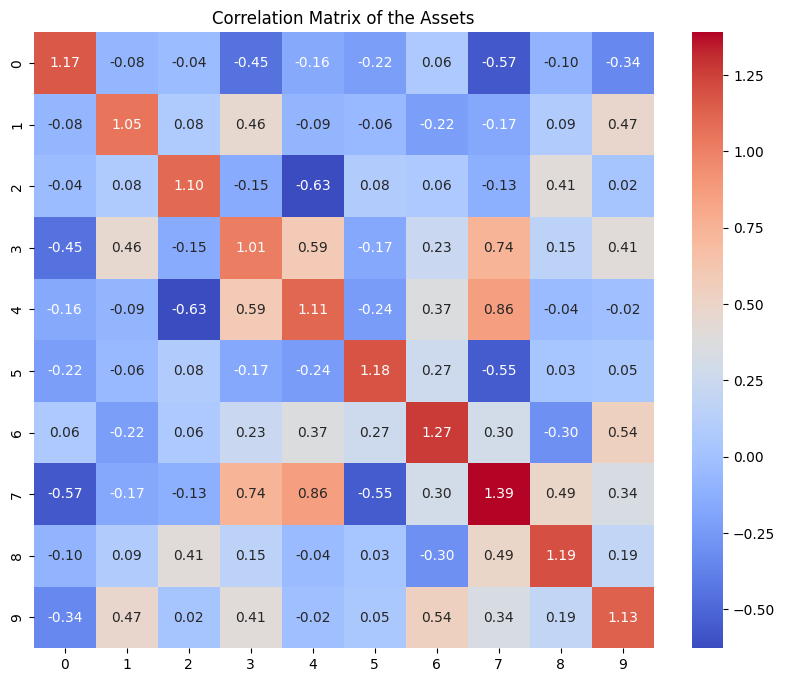

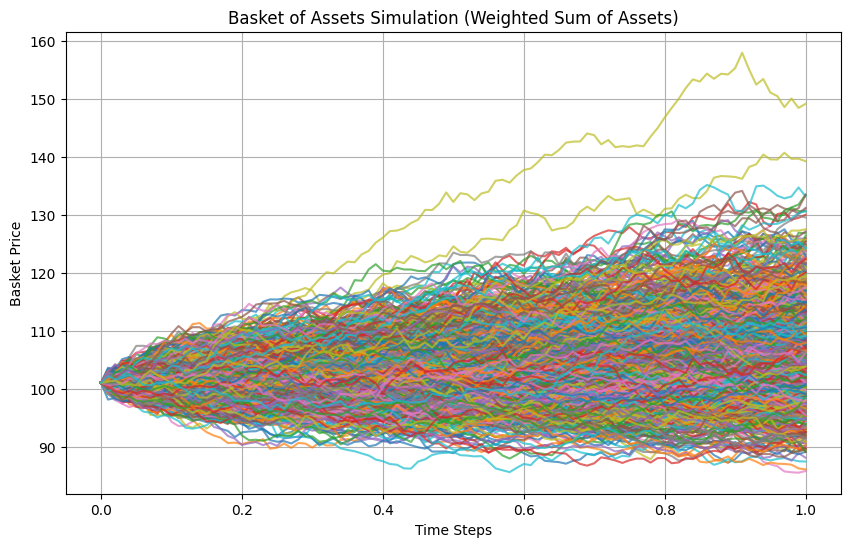

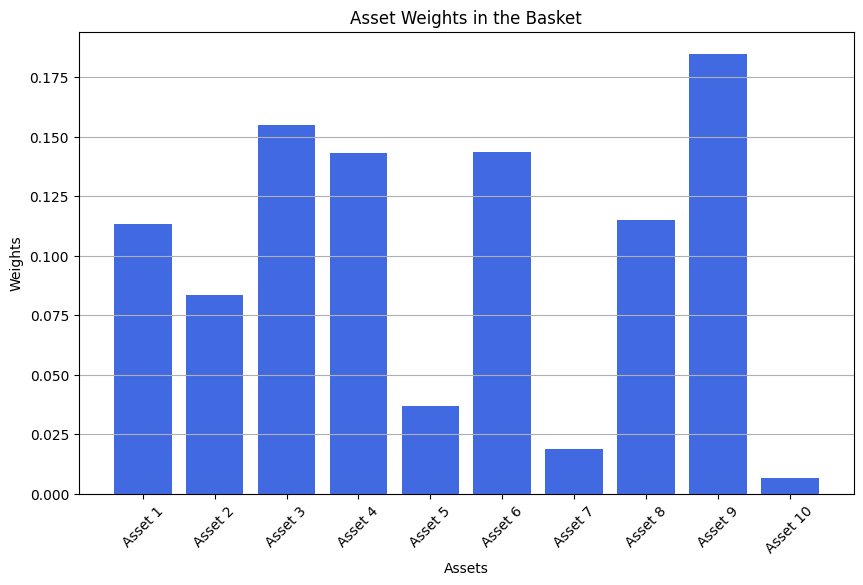

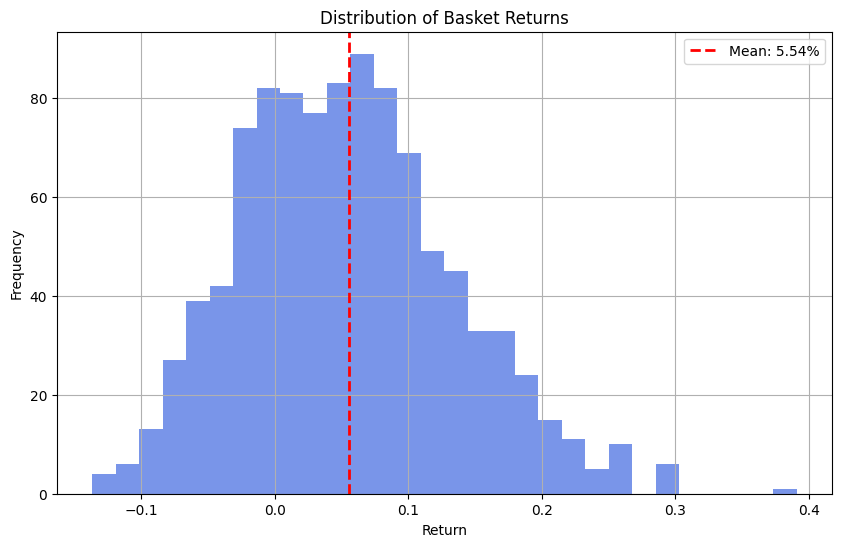

Expected Return: 5.54%
Volatility: 8.02%
Min Return: -13.68%
Max Return: 39.10%
5% VaR: -6.27%
European Call Option Price (K=101.04): 6.68


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class BasketSimulation:
    def __init__(self, S0, mu, sigma, correlation_matrix, T, dt, n_paths, weights):
        """
        S0: Initial spot prices (array)
        mu: Drift (expected return) for each asset (array)
        sigma: Volatilities for each asset (array)
        correlation_matrix: Correlation matrix (2D)
        T: Time to maturity (in years)
        dt: Time step (in years)
        n_paths: Number of simulation paths
        weights: Weights of each asset in the basket (array)
        """
        self.S0 = np.array(S0)
        self.mu = np.array(mu)
        self.sigma = np.array(sigma)
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_assets = len(S0)
        self.n_steps = int(T / dt)
        self.weights = np.array(weights)

        # Ensure the correlation matrix is positive definite and adjust it within the class
        self.correlation_matrix = self._ensure_positive_definite(correlation_matrix)

        # Cholesky decomposition of the correlation matrix
        self.L = np.linalg.cholesky(self.correlation_matrix)

    def _ensure_positive_definite(self, matrix):
        """Find the nearest positive definite matrix to the given matrix"""
        B = (matrix + matrix.T) / 2
        _, s, V = np.linalg.svd(B)
        H = np.dot(V.T, np.dot(np.diag(s), V))
        A2 = (B + H) / 2
        A3 = (A2 + A2.T) / 2

        if self._is_positive_definite(A3):
            return A3
        else:
            spacing = np.spacing(np.linalg.norm(matrix))
            I = np.eye(matrix.shape[0])
            k = 1
            while not self._is_positive_definite(A3):
                mineig = np.min(np.real(np.linalg.eigvals(A3)))
                A3 += I * (-mineig * k**2 + spacing)
                k += 1
            return A3

    def _is_positive_definite(self, matrix):
        """Check if a matrix is positive definite"""
        try:
            np.linalg.cholesky(matrix)
            return True
        except np.linalg.LinAlgError:
            return False

    def simulate(self):
        # Initialize matrices for spot prices and correlated random variables
        S = np.zeros((self.n_steps + 1, self.n_assets, self.n_paths))
        basket = np.zeros((self.n_steps + 1, self.n_paths))  # Basket price at each time step
        S[0] = self.S0[:, np.newaxis]  # Initial prices for each asset
        basket[0] = np.sum(self.S0 * self.weights)  # Basket price at t=0

        # Simulate paths
        for t in range(1, self.n_steps + 1):
            Z = np.random.standard_normal((self.n_assets, self.n_paths))  # Standard normal random variables
            correlated_Z = np.dot(self.L, Z)  # Apply correlation structure

            for i in range(self.n_assets):
                S[t, i] = S[t - 1, i] * np.exp((self.mu[i] - 0.5 * self.sigma[i]**2) * self.dt +
                                                self.sigma[i] * np.sqrt(self.dt) * correlated_Z[i])

            # Calculate the basket price as the weighted sum of the asset prices
            basket[t] = np.sum(S[t] * self.weights[:, np.newaxis], axis=0)

        return basket, S

    def plot(self):
        basket, S = self.simulate()

        # Plot the correlation matrix of the assets
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
        plt.title("Correlation Matrix of the Assets")
        plt.show()

        # Plot the simulated paths for the basket (starting from the initial value)
        plt.figure(figsize=(10, 6))
        plt.plot(np.linspace(0, self.T, self.n_steps + 1), basket, alpha=0.7)
        plt.title("Basket of Assets Simulation (Weighted Sum of Assets)")
        plt.xlabel("Time Steps")
        plt.ylabel("Basket Price")
        plt.grid(True)
        plt.show()

        # Plot the weights of each asset in the basket
        plt.figure(figsize=(10, 6))
        plt.bar(range(self.n_assets), self.weights, color='royalblue')
        plt.title("Asset Weights in the Basket")
        plt.xlabel("Assets")
        plt.ylabel("Weights")
        plt.xticks(range(self.n_assets), [f"Asset {i+1}" for i in range(self.n_assets)], rotation=45)
        plt.grid(True, axis='y')
        plt.show()

    def analyze_returns(self):
        """Analyze the returns of the basket"""
        basket, S = self.simulate()

        # Calculate returns for each path
        returns = (basket[-1] - basket[0]) / basket[0]

        # Plot histogram of returns
        plt.figure(figsize=(10, 6))
        plt.hist(returns, bins=30, alpha=0.7, color='royalblue')
        plt.axvline(np.mean(returns), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(returns):.2%}')
        plt.title("Distribution of Basket Returns")
        plt.xlabel("Return")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

        # Calculate and print statistics
        print(f"Expected Return: {np.mean(returns):.2%}")
        print(f"Volatility: {np.std(returns):.2%}")
        print(f"Min Return: {np.min(returns):.2%}")
        print(f"Max Return: {np.max(returns):.2%}")
        print(f"5% VaR: {np.percentile(returns, 5):.2%}")

        return returns

# Example usage with 10 assets and corresponding weights

# Random initial prices, volatilities, and drifts for 10 assets
S0 = np.random.uniform(90, 110, 10)  # Initial prices between 90 and 110
mu = np.random.uniform(0.03, 0.08, 10)  # Drift between 3% and 8%
sigma = np.random.uniform(0.1, 0.3, 10)  # Volatility between 10% and 30%

# Random correlation matrix generation
# Generate a random matrix and convert it into a valid correlation matrix
random_matrix = np.random.uniform(-1, 1, (10, 10))
random_matrix = (random_matrix + random_matrix.T) / 2  # Symmetrize the matrix
np.fill_diagonal(random_matrix, 1)  # Set diagonal to 1

# Normalize weights to sum to 1
weights = np.random.uniform(0, 1, 10)
weights /= np.sum(weights)

# Time to maturity (1 year), time step (daily), and number of paths (1000)
T = 1
dt = 0.01
n_paths = 1000  # Increased from 10 to 1000 for more robust statistics


# Create and run the basket simulation
basket = BasketSimulation(S0, mu, sigma, random_matrix, T, dt, n_paths, weights)
basket.plot()
basket.analyze_returns()

# Example of how to use the simulation for option pricing
def price_european_call(basket_simulation, strike_price):
    """Price a European call option on the basket"""
    basket, _ = basket_simulation.simulate()

    # Final values of the basket
    final_values = basket[-1]

    # Payoffs at maturity
    payoffs = np.maximum(final_values - strike_price, 0)

    # Risk-neutral expectation (discounted average)
    risk_free_rate = 0.05  # Assume 5% risk-free rate
    option_price = np.exp(-risk_free_rate * basket_simulation.T) * np.mean(payoffs)

    return option_price

# Example usage
strike = basket.S0 @ basket.weights  # ATM strike
option_price = price_european_call(basket, strike)
print(f"European Call Option Price (K={strike:.2f}): {option_price:.2f}")


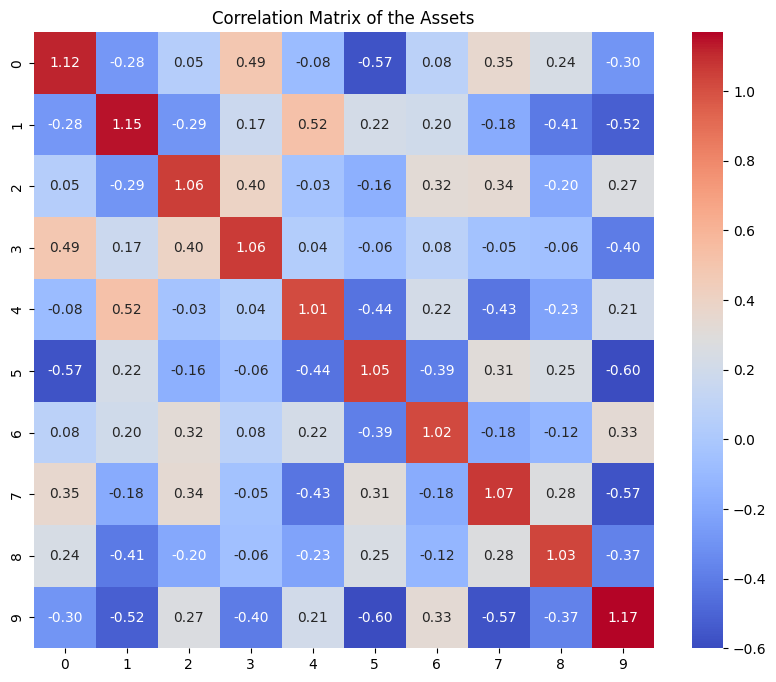

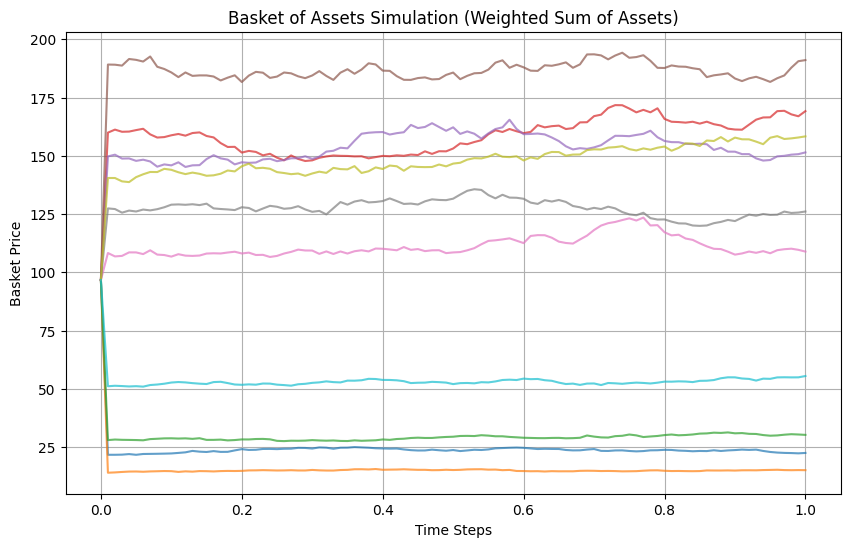

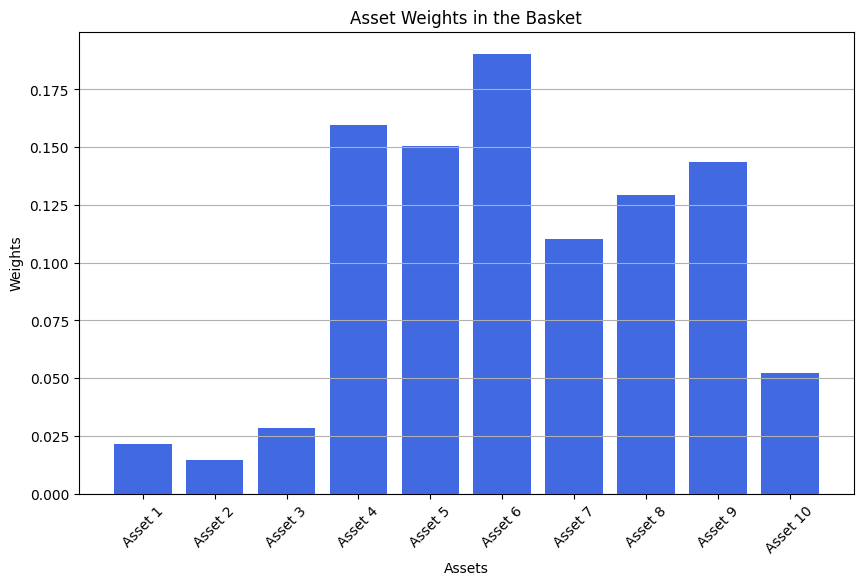

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class BasketSimulation:
    def __init__(self, S0, mu, sigma, correlation_matrix, T, dt, n_paths, weights):
        """
        S0: Initial spot prices (array)
        mu: Drift (expected return) for each asset (array)
        sigma: Volatilities for each asset (array)
        correlation_matrix: Correlation matrix (2D)
        T: Time to maturity (in years)
        dt: Time step (in years)
        n_paths: Number of simulation paths
        weights: Weights of each asset in the basket (array)
        """
        self.S0 = np.array(S0)
        self.mu = np.array(mu)
        self.sigma = np.array(sigma)
        self.correlation_matrix = np.array(correlation_matrix)
        self.T = T
        self.dt = dt
        self.n_paths = n_paths
        self.n_assets = len(S0)
        self.n_steps = int(T / dt)
        self.weights = np.array(weights)
        
        # Cholesky decomposition of the correlation matrix
        self.L = self._ensure_positive_definite(self.correlation_matrix)

    def _ensure_positive_definite(self, matrix):
        """Ensure the correlation matrix is positive semi-definite"""
        eigvals, eigvecs = np.linalg.eigh(matrix)
        eigvals = np.maximum(eigvals, 0)
        new_matrix = eigvecs @ np.diag(eigvals) @ eigvecs.T
        return new_matrix

    def simulate(self):
        # Initialize matrices for spot prices and correlated random variables
        S = np.zeros((self.n_steps + 1, self.n_assets, self.n_paths))
        basket = np.zeros((self.n_steps + 1, self.n_paths))  # Basket price at each time step
        S[0] = self.S0[:, np.newaxis]  # Initial prices for each asset
        basket[0] = np.sum(self.S0 * self.weights)  # Basket price at t=0

        # Simulate paths
        for t in range(1, self.n_steps + 1):
            Z = np.random.standard_normal((self.n_assets, self.n_paths))  # Standard normal random variables
            correlated_Z = np.dot(self.L, Z)  # Apply correlation structure

            for i in range(self.n_assets):
                S[t, i] = S[t - 1, i] * np.exp((self.mu[i] - 0.5 * self.sigma[i]**2) * self.dt + 
                                                self.sigma[i] * np.sqrt(self.dt) * correlated_Z[i])

            # Calculate the basket price as the weighted sum of the asset prices
            basket[t] = np.sum(S[t] * self.weights, axis=0)

        return basket, S

    def plot(self):
        basket, S = self.simulate()

        # Plot the correlation matrix of the assets
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
        plt.title("Correlation Matrix of the Assets")
        plt.show()

        # Plot the simulated paths for the basket (starting from the initial value)
        plt.figure(figsize=(10, 6))
        plt.plot(np.linspace(0, self.T, self.n_steps + 1), basket, alpha=0.7)
        plt.title("Basket of Assets Simulation (Weighted Sum of Assets)")
        plt.xlabel("Time Steps")
        plt.ylabel("Basket Price")
        plt.grid(True)
        plt.show()

        # Plot the weights of each asset in the basket
        plt.figure(figsize=(10, 6))
        plt.bar(range(self.n_assets), self.weights, color='royalblue')
        plt.title("Asset Weights in the Basket")
        plt.xlabel("Assets")
        plt.ylabel("Weights")
        plt.xticks(range(self.n_assets), [f"Asset {i+1}" for i in range(self.n_assets)], rotation=45)
        plt.grid(True, axis='y')
        plt.show()

        # Calculate performance attribution
        performance_attribution = np.zeros((self.n_steps, self.n_assets))
        for t in range(1, self.n_steps + 1):
            basket_change = basket[t] - basket[t - 1]
            if basket_change != 0:  # Prevent division by zero
                for i in range(self.n_assets):
                    asset_change = S[t, i] - S[t - 1, i]
                    performance_attribution[t - 1, i] = self.weights[i] * asset_change / basket_change

        # Create stacked column chart for performance attribution
        attribution_cumulative = np.cumsum(performance_attribution, axis=1)  # Cumulative sum to get stacked bars

        # Plot performance attribution as stacked bars
        plt.figure(figsize=(10, 6))
        for i in range(self.n_assets):
            plt.bar(np.linspace(0, self.T, self.n_steps), attribution_cumulative[:, i], 
                    alpha=0.7, label=f"Asset {i+1}")
        plt.title("Performance Attribution Over Time (Stacked)")
        plt.xlabel("Time Steps")
        plt.ylabel("Attribution Contribution")
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Assets")
        plt.grid(True)
        plt.show()

# Example usage with 10 assets and corresponding weights

# Random initial prices, volatilities, and drifts for 10 assets
S0 = np.random.uniform(90, 110, 10)  # Initial prices between 90 and 110
mu = np.random.uniform(0.03, 0.08, 10)  # Drift between 3% and 8%
sigma = np.random.uniform(0.1, 0.3, 10)  # Volatility between 10% and 30%

# Random correlation matrix generation
random_matrix = np.random.uniform(-1, 1, (10, 10))
random_matrix = (random_matrix + random_matrix.T) / 2  # Symmetrize the matrix
np.fill_diagonal(random_matrix, 1)  # Set diagonal to 1

# Ensure the matrix is positive semi-definite (via eigen decomposition)
eigenvalues, eigenvectors = np.linalg.eigh(random_matrix)
eigenvalues = np.maximum(eigenvalues, 0)  # Ensure no negative eigenvalues
correlation_matrix = np.dot(eigenvectors, np.dot(np.diag(eigenvalues), eigenvectors.T))

# Normalize weights to sum to 1
weights = np.random.uniform(0, 1, 10)
weights /= np.sum(weights)

# Time to maturity (1 year), time step (daily), and number of paths (10)
T = 1
dt = 0.01
n_paths = 10

# Create and plot the basket simulation
basket = BasketSimulation(S0, mu, sigma, correlation_matrix, T, dt, n_paths, weights)
basket.plot()
